# A. Formulasi Masalah
Dataset tersebut akan memprediksi curah hujan dari pengamatan Badan Meteorologi Klimatologi dan Geofisika (BMKG). Dimana dataset Curah Hujan Tahun 2018-2024 yang didapatan dari website BMKG data dengan link:
https://dataonline.bmkg.go.id/

In [1]:
# Import library yang diperlukan
import numpy as np  # Untuk operasi matematika dan manipulasi array
import pandas as pd  # Untuk manipulasi dan analisis data tabular (dataframe)
import matplotlib.pyplot as plt  # Untuk visualisasi data dalam berbagai grafik
from matplotlib import pyplot  # Untuk fungsi tambahan dalam visualisasi
import matplotlib.dates as mdates  # Untuk manipulasi dan format tanggal dalam grafik
import seaborn as sns  # Untuk visualisasi statistik yang lebih menarik dan informatif
from scipy import stats  # Untuk komputasi ilmiah dan analisis statistik
from scipy.stats import zscore  # Untuk menghitung nilai z-score (standarisasi data)
from sklearn.preprocessing import MinMaxScaler  # Untuk normalisasi data ke rentang [0, 1]
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Untuk visualisasi autocorrelation dan partial autocorrelation
from sklearn.model_selection import train_test_split, GridSearchCV  # Untuk pemisahan data dan pencarian hyperparameter
from sklearn.utils import resample  # Untuk teknik sampling ulang seperti bootstrap
from sklearn.ensemble import BaggingRegressor  # Model ensemble yang menggunakan teknik bootstrap untuk regresi
from sklearn.svm import SVR  # Support Vector Regression untuk model regresi
from sklearn.metrics import root_mean_squared_error # Untuk mengukur performa model regresi
import joblib  # Untuk menyimpan dan memuat model atau objek Python

# B. Pengumpulan Data

Data dikumpulkan dari BMKG Stasiun Meteorologi Perak I melalui situs web resmi BMKG (http://dataonline.bmkg.go.id/). Data yang digunakan adalah data harian yang mencakup periode dari Januari 2018 hingga Juli 2024. Parameter data yang dikumpulkan meliputi temperatur udara (°C), kelembapan udara (%), kecepatan angin (m/s), dan curah hujan (mm).

In [2]:
# Langkah 1: Definisikan URL untuk file CSV di GitHub
url = "https://raw.githubusercontent.com/rizkyjisantt/skripsi/refs/heads/main/laporan_iklim_2018-2024_terbaru.csv"

# Langkah 2: Ambil data dari GitHub dan masukkan ke dalam DataFrame
data = pd.read_csv(url)

# Langkah 3: Ubah nama format tanggal
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d-%m-%Y')
data.set_index(['Tanggal'],inplace=True)

# Langkah 4: Ubah nama kolom sesuai dengan instruksi
data.rename(columns={
    "Tavg": "temperatur",
    "RH_avg": "kelembapan",
    "ff_avg": "kecepatan_angin",
    "RR": "curah_hujan"
}, inplace=True)

# Langkah 5: Tampilkan beberapa baris pertama dari data
print(data.head())


            temperatur  kelembapan  kecepatan_angin  curah_hujan
Tanggal                                                         
2018-01-01        28.6        78.0              1.0          0.0
2018-01-02        28.0        83.0              0.0          2.9
2018-01-03        29.0        80.0              0.0          1.0
2018-01-04        28.9        83.0              1.0          0.0
2018-01-05        28.2        82.0              0.0          3.0


In [3]:
# Melihat struktur kolom dan baris dari data frame
print(data.shape)

(2557, 4)


# C. Analisis Data Eksplorasi


## Statistik Deskriptif
Melihat ringkasan statistik seperti mean, median, dan deviasi standar untuk menganalisis nilai-nilai pusat dan sebaran data.

In [4]:
# Melihat informasi umum tentang dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2557 entries, 2018-01-01 to 2024-12-31
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperatur       2557 non-null   float64
 1   kelembapan       2557 non-null   float64
 2   kecepatan_angin  2557 non-null   float64
 3   curah_hujan      2437 non-null   float64
dtypes: float64(4)
memory usage: 99.9 KB
None


In [5]:
# Melihat statistik deskriptif dari dataset
print(data.describe())

        temperatur   kelembapan  kecepatan_angin  curah_hujan
count  2557.000000  2557.000000      2557.000000  2437.000000
mean     28.884904    74.381306         3.466289     5.132294
std       1.166760     7.266332         2.891269    13.272184
min      25.300000    54.000000         0.000000     0.000000
25%      28.100000    69.000000         1.000000     0.000000
50%      28.800000    74.000000         2.000000     0.000000
75%      29.600000    80.000000         5.400000     2.600000
max      32.400000    93.000000        10.400000   166.000000


## Visualisasi Data

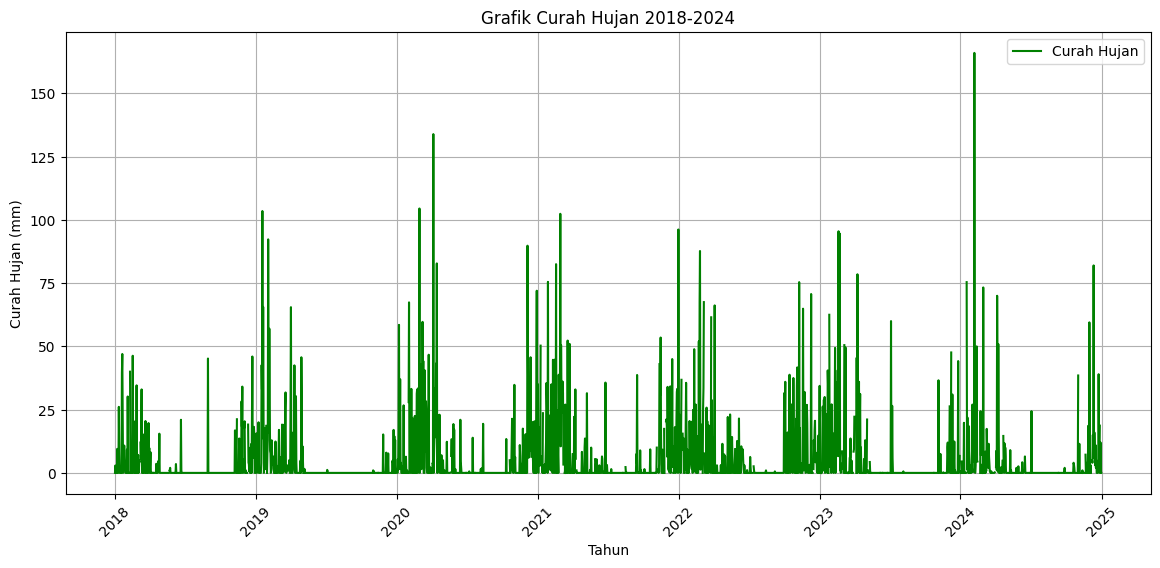

In [6]:
#plot grafik curah hujan dari 2018-2024
plt.figure(figsize=(14, 6)) # Membuat figure dengan ukuran lebar 14 inci dan tinggi 6 inci
plt.plot(data['curah_hujan'], label='Curah Hujan', color='green') # Membuat grafik garis untuk data curah hujan dengan warna biru

plt.title('Grafik Curah Hujan 2018-2024') # Menambahkan judul pada grafik
plt.xlabel('Tahun') # Menambahkan label sumbu-x sebagai "Tahun"
plt.ylabel('Curah Hujan (mm)') # Menambahkan label sumbu-y sebagai "Curah Hujan (mm)"

# Mengatur penanda pada sumbu-x agar menampilkan tahun secara berkala
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Mengatur format penulisan tanggal pada sumbu-x menjadi hanya tahun (YYYY)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45) # Memutar label pada sumbu-x sebesar 45 derajat untuk tampilan yang lebih baik
plt.legend() # Menampilkan legenda pada grafik
plt.grid() # Menambahkan garis kisi pada grafik untuk memudahkan pembacaan data
plt.show() # Menampilkan grafik yang telah dibuat

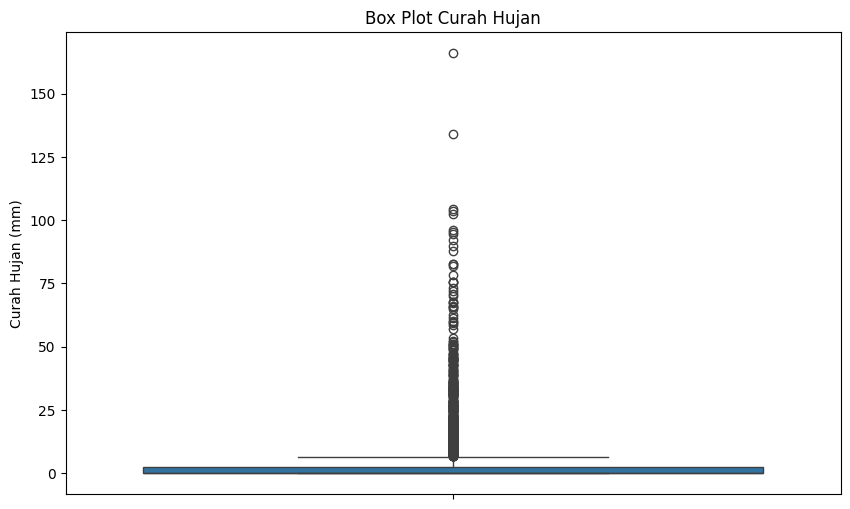

In [7]:
# Box plot untuk curah hujan
plt.figure(figsize=(10,6))
sns.boxplot(y=data['curah_hujan'])
plt.title('Box Plot Curah Hujan')
plt.ylabel('Curah Hujan (mm)')
plt.show()

# D. Pra-pemrosesan Data

## imputasi Missing Value

Cek Missing Values


In [8]:
# Cek missing value sebelum interpolasi
print("Missing values sebelum interpolasi:")
print(data[['temperatur', 'kelembapan', 'kecepatan_angin', 'curah_hujan']].isnull().sum())

Missing values sebelum interpolasi:
temperatur           0
kelembapan           0
kecepatan_angin      0
curah_hujan        120
dtype: int64



Interpolasi data menggunakan metode linear untuk mengisi missing values.

In [9]:
# Melakukan interpolasi linear untuk setiap kolom
data['curah_hujan'] = data['curah_hujan'].interpolate(method='linear')

# Cek missing value setelah interpolasi
print("\nMissing values setelah interpolasi:")
print(data.isnull().sum())


Missing values setelah interpolasi:
temperatur         0
kelembapan         0
kecepatan_angin    0
curah_hujan        0
dtype: int64


## Identifikasi Outlier

Cek Outlier: Outlier biasanya diidentifikasi jika Z-Score lebih besar dari 3 atau lebih kecil dari -3. Berikut kode untuk mencari nilai-nilai outlier:

In [10]:
# Hitung z-score untuk 4 fitur
data_zscore = data[['temperatur', 'kelembapan', 'kecepatan_angin', 'curah_hujan']].apply(zscore)

# Definisikan ambang batas z-score untuk mendeteksi outlier
threshold = 3

# Identifikasi data yang merupakan outlier (z-score > 3 atau < -3)
outliers = (data_zscore > threshold) | (data_zscore < -3)
print("Jumlah outlier per kolom:")
print(outliers.sum())

Jumlah outlier per kolom:
temperatur          3
kelembapan          0
kecepatan_angin     0
curah_hujan        63
dtype: int64


In [11]:
# Cetak beberapa data yang termasuk outlier
print("\nData yang teridentifikasi sebagai outlier:")
print(data[outliers.any(axis=1)])


Data yang teridentifikasi sebagai outlier:
            temperatur  kelembapan  kecepatan_angin  curah_hujan
Tanggal                                                         
2018-01-20        26.6        87.0              1.0         47.0
2018-02-16        27.8        81.0              2.0         46.3
2018-08-30        27.9        71.0              2.0         45.2
2018-12-23        28.6        83.0              1.0         46.0
2019-01-18        27.9        84.0              2.0        103.5
...                ...         ...              ...          ...
2024-02-29        29.1        82.0              0.0         73.3
2024-04-05        29.8        78.0              2.0         70.0
2024-04-08        28.5        86.0              0.0         50.9
2024-11-30        28.3        83.0              1.0         59.5
2024-12-11        28.6        82.0              1.0         82.0

[66 rows x 4 columns]



Setelah mengidentifikasi outlier, kita akan mengganti nilai outlier dengan rata-rata atau nilai terdekat.

In [12]:
# Buat salinan data asli untuk penggantian outlier
#data_outlier = data.copy()

# Loop melalui setiap kolom dan ganti nilai outlier dengan rata-rata atau median
#for col in ['temperatur', 'curah_hujan']:
    # Identifikasi indeks dari nilai yang merupakan outlier
    #outlier_index = data_zscore[col][(data_zscore[col] > threshold) | (data_zscore[col] < -3)].index

    # Hitung rata-rata atau median dari data yang tidak terpengaruh outlier
    # Menggunakan median atau rata-rata sebagai nilai pengganti
    #mean_value = data_outlier[col].mean()  # Rata-rata dari seluruh kolom
    #median_value = data_outlier[col].median()  # Median dari seluruh kolom

    # Pilih apakah menggunakan rata-rata atau median
    #replace_with = mean_value  # Ganti dengan mean, atau gunakan median_value untuk median

    # Ganti outlier dengan nilai yang dihitung
    #data_outlier.loc[outlier_index, col] = replace_with

# Cek data yang telah diperbaiki
#print("\nData setelah outlier diganti dengan rata-rata atau median:")
#print(data_outlier[outliers.any(axis=1)])


In [13]:
# Buat salinan data asli untuk penggantian outlier
data_outlier = data.copy()

# Loop melalui setiap kolom dan ganti nilai outlier dengan interpolasi
for col in ['temperatur', 'curah_hujan']:
    # Identifikasi indeks dari nilai yang merupakan outlier
    outlier_index = data_zscore[col][(data_zscore[col] > threshold) | (data_zscore[col] < -3)].index

    # Ganti nilai outlier dengan NaN terlebih dahulu agar bisa diinterpolasi
    data_outlier.loc[outlier_index, col] = np.nan

# Lakukan interpolasi untuk mengganti NaN (nilai outlier yang telah diganti)
data_outlier.interpolate(method='linear', inplace=True)

# Cek data yang telah diperbaiki
print("\nData setelah outlier diganti dengan interpolasi:")
print(data_outlier[outliers.any(axis=1)])


Data setelah outlier diganti dengan interpolasi:
            temperatur  kelembapan  kecepatan_angin  curah_hujan
Tanggal                                                         
2018-01-20        26.6        87.0              1.0        30.05
2018-02-16        27.8        81.0              2.0         5.80
2018-08-30        27.9        71.0              2.0         0.00
2018-12-23        28.6        83.0              1.0        15.40
2019-01-18        27.9        84.0              2.0        23.35
...                ...         ...              ...          ...
2024-02-29        29.1        82.0              0.0         0.00
2024-04-05        29.8        78.0              2.0        15.30
2024-04-08        28.5        86.0              0.0         8.05
2024-11-30        28.3        83.0              1.0        13.50
2024-12-11        28.6        82.0              1.0         6.00

[66 rows x 4 columns]


## Normalisasi Data


Kita akan menggunakan MinMaxScaler dari Scikit-learn untuk melakukan normalisasi pada fitur-fitur yang diinginkan.

In [14]:
#max_vals_norm = data_outlier.max()
#min_vals_norm = data_outlier.min()
#def normalize(df):
  #normalized_df = (df - min_vals_norm) / (max_vals_norm - min_vals_norm)
  #return normalized_df
#data_scaled = normalize(data_outlier)
#print(data_scaled.head(10))

In [15]:
# Inisialisasi MinMaxScaler dengan rentang [0, 1]
scaler = MinMaxScaler()

# Pilih fitur yang ingin dinormalisasi
features_to_normalize = ['temperatur', 'kelembapan', 'kecepatan_angin', 'curah_hujan']

# Lakukan normalisasi untuk setiap fitur
data_scaled = data_outlier.copy()  # Buat salinan data asli
data_scaled[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Lihat hasil normalisasi
print("\nData setelah normalisasi Min-Max:")
print(data_scaled.head(10))


Data setelah normalisasi Min-Max:
            temperatur  kelembapan  kecepatan_angin  curah_hujan
Tanggal                                                         
2018-01-01    0.464789    0.615385         0.096154     0.000000
2018-01-02    0.380282    0.743590         0.000000     0.017470
2018-01-03    0.521127    0.666667         0.000000     0.006024
2018-01-04    0.507042    0.743590         0.096154     0.000000
2018-01-05    0.408451    0.717949         0.000000     0.018072
2018-01-06    0.366197    0.692308         0.096154     0.000000
2018-01-07    0.211268    0.871795         0.000000     0.057229
2018-01-08    0.408451    0.666667         0.096154     0.003012
2018-01-09    0.563380    0.564103         0.096154     0.000000
2018-01-10    0.436620    0.717949         0.192308     0.009036


## Sliding Window

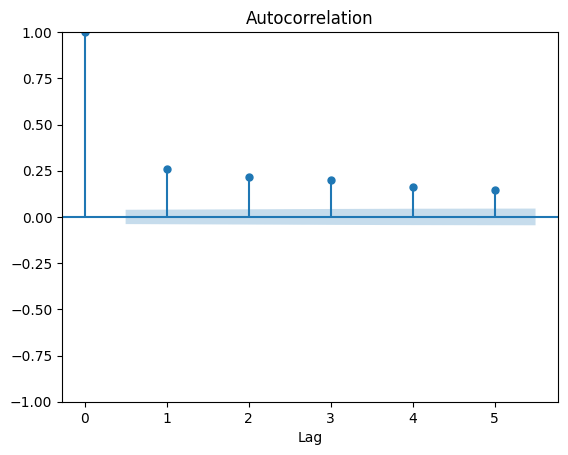

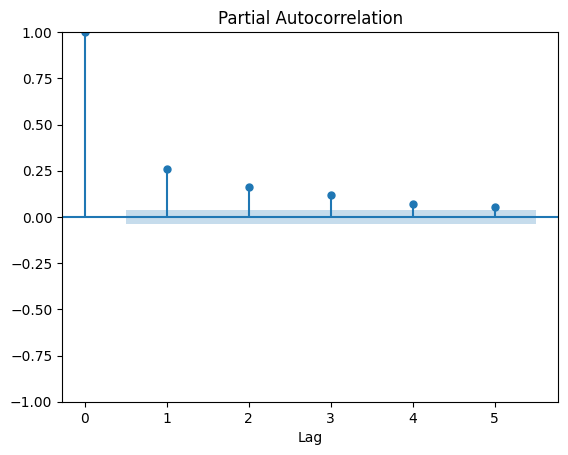

In [16]:
# Plot autokorelasi untuk curah hujan
plot_acf(data_scaled['curah_hujan'], lags=5)
plt.xlabel('Lag')
plt.show()

# Plot partial autocorrelation untuk curah hujan
plot_pacf(data_scaled['curah_hujan'], lags=5, alpha=0.05)
plt.xlabel('Lag')
plt.show()

In [17]:
# DataFrame yang sudah dinormalisasi dan diubah ke format supervised
df = data_scaled.copy()

# Menambahkan lag untuk Temperatur, Kelembapan, Kecepatan Angin
df['temperatur_lag'] = df['temperatur']
df['kelembapan_lag'] = df['kelembapan']
df['kecepatan_angin_lag'] = df['kecepatan_angin']

# Menambahkan lag untuk Curah Hujan (lag 1 hingga lag 4)
lags = [1, 2, 3, 4]
for lag in lags:
    df[f'curah_hujan_lag{lag}'] = df['curah_hujan'].shift(lag)

# Drop baris dengan nilai NaN akibat lag
df_supervised = df.dropna()

# E. Pembagian Data 80:20
Untuk pembagian data, kita akan menggunakan train_test_split dengan rasio 80% untuk training dan 20% untuk testing.

In [18]:
# Pisahkan input (X) dan target (y)
X = df_supervised[[col for col in df_supervised.columns if 'lag' in col]]
y = df_supervised['curah_hujan']  # Target adalah Curah_Hujan

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

# Tampilkan ukuran dari setiap bagian data
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

# Tampilkan tanggal awal dan akhir untuk training dan testing
train_dates = (X_train.index.min(), X_train.index.max())
test_dates = (X_test.index.min(), X_test.index.max())
print(f"Tanggal untuk data training: {train_dates[0]} hingga {train_dates[1]}")
print(f"Tanggal untuk data testing: {test_dates[0]} hingga {test_dates[1]}")

Ukuran X_train: (2042, 7)
Ukuran X_test: (511, 7)
Ukuran y_train: (2042,)
Ukuran y_test: (511,)
Tanggal untuk data training: 2018-01-05 00:00:00 hingga 2023-08-08 00:00:00
Tanggal untuk data testing: 2023-08-09 00:00:00 hingga 2024-12-31 00:00:00


# F. Modelling

## Skenario 1
Bootstrap samples = 5, kernel = Linear


Bootstrap Sampling untuk Membuat 5 Subset.

Sekarang kita akan membagi training set (X_train, y_train) menjadi 5 subset menggunakan bootstrap sampling.

In [138]:
# Gabungkan fitur dan target dalam satu dataframe untuk bootstrap sampling
train_data = pd.concat([X_train, y_train], axis=1)

# Tentukan jumlah subset
n_subsets = 5
n_samples = len(train_data)  # Jumlah data di training set

# List untuk menyimpan subset bootstrap
bootstrap_subsets_S1 = []

# Lakukan bootstrap sampling 5 kali
for i in range(n_subsets):
    # Lakukan sampling dengan pengembalian (replace=True)
    subset = train_data.sample(n=n_samples, replace=True, random_state=42+i)
    bootstrap_subsets_S1.append(subset)

# Cek jumlah data di tiap subset
for i, subset in enumerate(bootstrap_subsets_S1):
    print(f"Ukuran subset {i+1}: {subset.shape}")


Ukuran subset 1: (2042, 8)
Ukuran subset 2: (2042, 8)
Ukuran subset 3: (2042, 8)
Ukuran subset 4: (2042, 8)
Ukuran subset 5: (2042, 8)


Setelah melakukan bootstrap sampling, kita perlu memisahkan kembali fitur (X) dan target (y) di setiap subset.

In [139]:
# Pisahkan fitur dan target di setiap subset bootstrap
bootstrap_X_train = []
bootstrap_y_train = []

# Lakukan iterasi pada subset bootstrap
for subset in bootstrap_subsets_S1:
    # Pisahkan fitur (Temperatur_lag1, Kelembapan_lag1, Kecepatan_Angin_lag1, Curah_Hujan_lag1 hingga Curah_Hujan_lag4)
    bootstrap_X_train.append(subset[['temperatur_lag',
                                     'kelembapan_lag',
                                     'kecepatan_angin_lag',
                                     'curah_hujan_lag1',
                                     'curah_hujan_lag2',
                                     'curah_hujan_lag3',
                                     'curah_hujan_lag4']])
    # Target tetap Curah_Hujan
    bootstrap_y_train.append(subset['curah_hujan'])

# Contoh melihat isi subset pertama (X dan y)
print("Fitur subset 1 (X):")
print(bootstrap_X_train[0].head())

print("\nTarget subset 1 (y):")
print(bootstrap_y_train[0].head())

# Sekarang kita punya 5 subset bootstrap_X_train dan bootstrap_y_train siap untuk pelatihan model


Fitur subset 1 (X):
            temperatur_lag  kelembapan_lag  kecepatan_angin_lag  \
Tanggal                                                           
2021-02-04        0.253521        0.794872             0.269231   
2022-01-03        0.380282        0.692308             0.509615   
2020-05-14        0.633803        0.461538             0.192308   
2021-07-22        0.549296        0.410256             0.884615   
2021-02-08        0.225352        0.871795             0.625000   

            curah_hujan_lag1  curah_hujan_lag2  curah_hujan_lag3  \
Tanggal                                                            
2021-02-04          0.006024          0.038554          0.136145   
2022-01-03          0.016265          0.082530          0.579518   
2020-05-14          0.000000          0.000000          0.003012   
2021-07-22          0.000000          0.000000          0.000000   
2021-02-08          0.072289          0.081325          0.210843   

            curah_hujan_lag4  
Ta

In [140]:
#for i, subset in enumerate(bootstrap_subsets):
    #subset.to_csv(f'bootstrap_subset_{i+1}.csv', index=False)


Latih Model SVR dengan Kernel Linear untuk Setiap Subset

In [141]:
# Tentukan parameter grid untuk SVR
param_grid = {
    'C': [0.0001, 0.001, 0.01],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['linear']  # Kernel linear tetap dipakai
}

# List untuk menyimpan model SVR dari setiap bootstrap
models = []

# Latih model SVR dengan GridSearch untuk setiap subset bootstrap
for i in range(len(bootstrap_X_train)):
    print(f"Melatih model SVR dengan GridSearch untuk subset bootstrap {i+1}")

    # Inisialisasi model SVR
    svr = SVR(kernel='linear')

    # Inisialisasi GridSearchCV
    grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1)

    # Latih model dengan GridSearch untuk mendapatkan parameter optimal
    grid_search.fit(bootstrap_X_train[i], bootstrap_y_train[i])

    # Simpan model terbaik yang dipilih oleh GridSearch
    best_model = grid_search.best_estimator_
    models.append(best_model)

    print(f"Model SVR terbaik untuk subset {i+1} dengan parameter: {grid_search.best_params_}\n")


Melatih model SVR dengan GridSearch untuk subset bootstrap 1
Model SVR terbaik untuk subset 1 dengan parameter: {'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear'}

Melatih model SVR dengan GridSearch untuk subset bootstrap 2
Model SVR terbaik untuk subset 2 dengan parameter: {'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear'}

Melatih model SVR dengan GridSearch untuk subset bootstrap 3
Model SVR terbaik untuk subset 3 dengan parameter: {'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear'}

Melatih model SVR dengan GridSearch untuk subset bootstrap 4
Model SVR terbaik untuk subset 4 dengan parameter: {'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear'}

Melatih model SVR dengan GridSearch untuk subset bootstrap 5
Model SVR terbaik untuk subset 5 dengan parameter: {'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear'}



Simpan Model yang Sudah Dilatih (Skenario 1)

In [142]:
# Simpan setiap model SVR yang telah dilatih
for i, model in enumerate(models):
    filename = f'skenario_1_model{i+1}.pkl'
    joblib.dump(model, filename)
    print(f'Model SVR subset bootstrap {i+1} disimpan sebagai {filename}')


Model SVR subset bootstrap 1 disimpan sebagai skenario_1_model1.pkl
Model SVR subset bootstrap 2 disimpan sebagai skenario_1_model2.pkl
Model SVR subset bootstrap 3 disimpan sebagai skenario_1_model3.pkl
Model SVR subset bootstrap 4 disimpan sebagai skenario_1_model4.pkl
Model SVR subset bootstrap 5 disimpan sebagai skenario_1_model5.pkl


Lakukan Pengujian dengan Data Testing pada Masing-masing Subset Bootstrap

In [143]:
# List untuk menyimpan hasil prediksi dari setiap model
predictions = []

# Lakukan pengujian dengan model yang telah disimpan pada skenario 1
for i in range(5):
    # Muat model yang telah disimpan
    filename = f'skenario_1_model{i+1}.pkl'
    model = joblib.load(filename)

    # Prediksi dengan model yang telah dilatih pada data testing
    y_pred = model.predict(X_test)

    # Simpan hasil prediksi
    predictions.append(y_pred)

    print(f'Hasil prediksi selesai untuk model subset bootstrap {i+1}')


Hasil prediksi selesai untuk model subset bootstrap 1
Hasil prediksi selesai untuk model subset bootstrap 2
Hasil prediksi selesai untuk model subset bootstrap 3
Hasil prediksi selesai untuk model subset bootstrap 4
Hasil prediksi selesai untuk model subset bootstrap 5


Agregasi Hasil Prediksi dari Semua Subset

In [144]:
# Lakukan agregasi hasil prediksi dengan menghitung rata-rata dari semua subset bootstrap
aggregated_predictions = np.mean(predictions, axis=0)

print('Agregasi prediksi selesai.')

Agregasi prediksi selesai.


In [145]:
# Fungsi untuk denormalisasi menggunakan MinMaxScaler
def denormalize(y):
    return y * (data_max - data_min) + data_min

# Min dan Max dari data asli
data_min = data_outlier['curah_hujan'].min()  # misalnya nilai minimum dari data asli sebelum normalisasi
data_max = data_outlier['curah_hujan'].max() # misalnya nilai maksimum dari data asli sebelum normalisasi

# Denormalisasi
y_true_denorm = denormalize(y_test)
y_pred_denorm = denormalize(y_pred)

In [146]:
# Fungsi manual untuk menghitung MAPE dengan penanganan khusus jika terdapat nilai aktual = 0
def calculate_mape_or_mae(y_test, y_pred):
    if (y_test == 0).any():  # Jika terdapat nilai aktual = 0
        mae = np.mean(np.abs(y_test - y_pred))
        return mae
    else:  # Jika tidak ada nilai aktual = 0
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        return mape

# Evaluasi model menggunakan RMSE dan MAPE
rmse_1 = root_mean_squared_error (y_test, y_pred) # Menggunakan library
mape_or_mae_1 = calculate_mape_or_mae(y_test, y_pred)

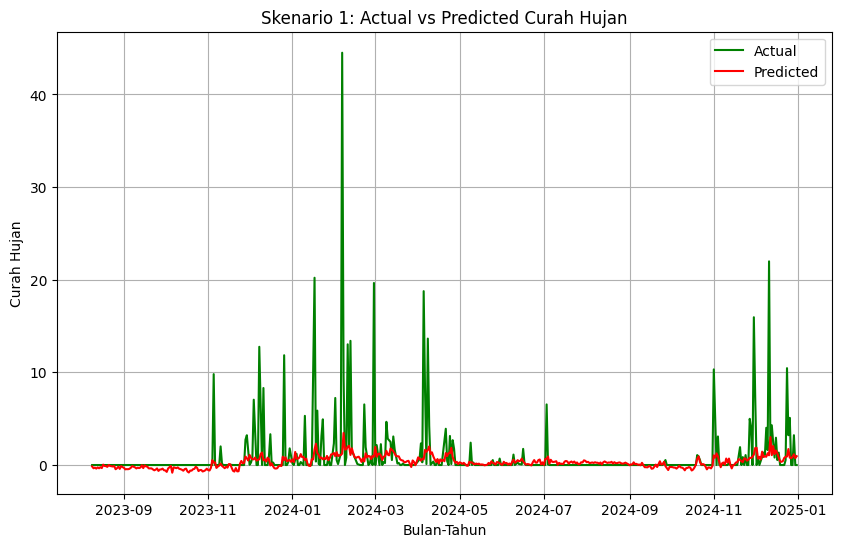

In [149]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_true_denorm, label='Actual', color='green', linestyle='-')
plt.plot(y_test.index, y_pred_denorm, label='Predicted', color='red', linestyle='-')
plt.title("Skenario 1: Actual vs Predicted Curah Hujan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Curah Hujan")
plt.legend()
plt.grid()
plt.show()

## Skenario 2
Bootstrap samples = 10, kernel = Linear

In [150]:
# Tentukan parameter grid untuk SVR
param_grid = {
    'C': [0.0001, 0.001, 0.01],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['linear']
}

# Inisialisasi model SVR dengan kernel RBF
svr = SVR(kernel='linear')

# GridSearch untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hyperparameter optimal
best_params = grid_search.best_params_
print("Hyperparameter optimal:", best_params)

Hyperparameter optimal: {'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear'}


In [151]:
# Menggunakan hyperparameter optimal untuk SVR
optimal_svr = SVR(kernel='linear', C=best_params['C'], epsilon=best_params['epsilon'])

# Ensemble Bagging Regressor dengan SVR
bagging_model = BaggingRegressor(estimator=optimal_svr, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

#Simpan model
joblib.dump(bagging_model, 'bagging_svr_model2.pkl')

['bagging_svr_model2.pkl']

In [152]:
# 13. Prediksi dengan model bagging
y_pred = bagging_model.predict(X_test)

In [153]:
# Fungsi untuk denormalisasi menggunakan MinMaxScaler
def denormalize(y):
    return y * (data_max - data_min) + data_min

# Min dan Max dari data asli
data_min = data_outlier['curah_hujan'].min()  # misalnya nilai minimum dari data asli sebelum normalisasi
data_max = data_outlier['curah_hujan'].max() # misalnya nilai maksimum dari data asli sebelum normalisasi

# Denormalisasi
y_true_denorm = denormalize(y_test)
y_pred_denorm = denormalize(y_pred)

In [154]:
# Fungsi manual untuk menghitung MAPE dengan penanganan khusus jika terdapat nilai aktual = 0
def calculate_mape_or_mae(y_test, y_pred):
    if (y_test == 0).any():  # Jika terdapat nilai aktual = 0
        mae = np.mean(np.abs(y_test - y_pred))
        return mae
    else:  # Jika tidak ada nilai aktual = 0
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        return mape

# Evaluasi model menggunakan RMSE dan MAPE
rmse_2 = root_mean_squared_error (y_test, y_pred)
mape_or_mae_2 = calculate_mape_or_mae(y_test, y_pred)

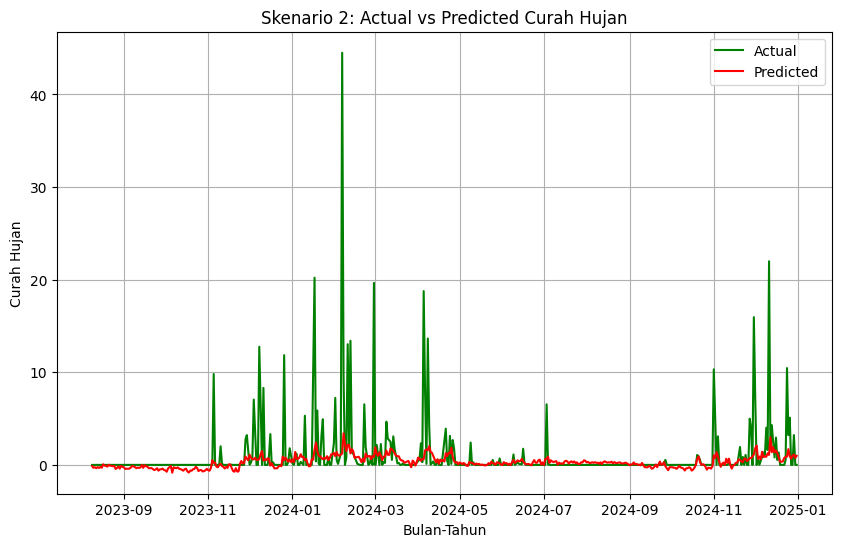

In [155]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_true_denorm, label='Actual', color='green', linestyle='-')
plt.plot(y_test.index, y_pred_denorm, label='Predicted', color='red', linestyle='-')
plt.title("Skenario 2: Actual vs Predicted Curah Hujan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Curah Hujan")
plt.legend()
plt.grid()
plt.show()

## Skenario 3
Bootstrap samples = 20, kernel = Linear

Inisialisasi model SVR dan Setup GridSearchCV untuk Pencarian Hyperparameter Optimal

In [156]:
# Tentukan parameter grid untuk SVR
param_grid = {
    'C': [0.0001, 0.001, 0.01],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['linear']
}

# Inisialisasi model SVR dengan kernel RBF
svr = SVR(kernel='linear')

# GridSearch untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hyperparameter optimal
best_params = grid_search.best_params_
print("Hyperparameter optimal:", best_params)

Hyperparameter optimal: {'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear'}


Gunakan Hyperparameter yang optimal untuk SVR dan Ensemble Bagging

In [157]:
# Menggunakan hyperparameter optimal untuk SVR
optimal_svr = SVR(kernel='linear', C=best_params['C'], epsilon=best_params['epsilon'])

# Ensemble Bagging Regressor dengan SVR
bagging_model = BaggingRegressor(estimator=optimal_svr, n_estimators=20, random_state=42)
bagging_model.fit(X_train, y_train)

#Simpan model
joblib.dump(bagging_model, 'bagging_svr_model3.pkl')

['bagging_svr_model3.pkl']

Prediksi dengan Data Testing, Denormalisasi dan Evaluasi

In [158]:
# 13. Prediksi dengan model bagging
y_pred = bagging_model.predict(X_test)

In [159]:
# Fungsi untuk denormalisasi menggunakan MinMaxScaler
def denormalize(y):
    return y * (data_max - data_min) + data_min

# Min dan Max dari data asli
data_min = data_outlier['curah_hujan'].min()  # misalnya nilai minimum dari data asli sebelum normalisasi
data_max = data_outlier['curah_hujan'].max() # misalnya nilai maksimum dari data asli sebelum normalisasi

# Denormalisasi
y_true_denorm = denormalize(y_test)
y_pred_denorm = denormalize(y_pred)

In [160]:
# Fungsi manual untuk menghitung MAPE dengan penanganan khusus jika terdapat nilai aktual = 0
def calculate_mape_or_mae(y_test, y_pred):
    if (y_test == 0).any():  # Jika terdapat nilai aktual = 0
        mae = np.mean(np.abs(y_test - y_pred))
        return mae
    else:  # Jika tidak ada nilai aktual = 0
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        return mape

# Evaluasi model menggunakan RMSE dan MAPE
rmse_3 = root_mean_squared_error (y_test, y_pred)
mape_or_mae_3 = calculate_mape_or_mae(y_test, y_pred)

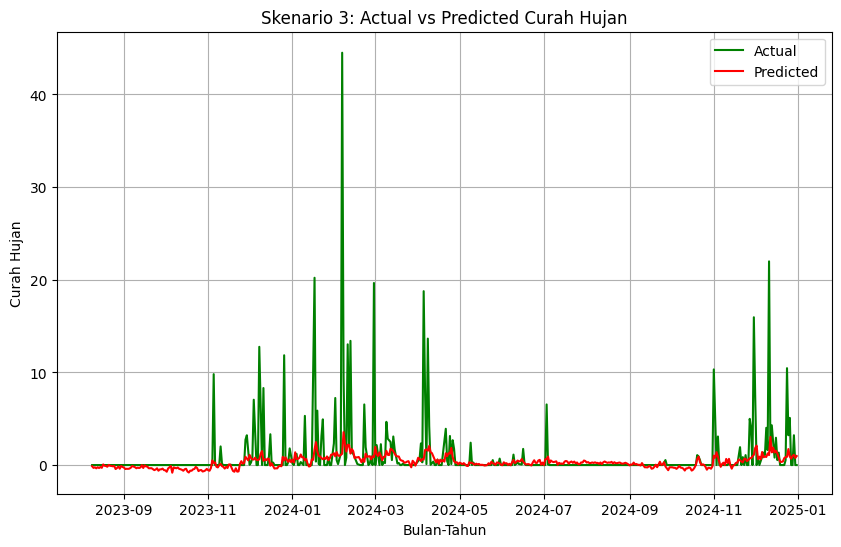

In [161]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_true_denorm, label='Actual', color='green', linestyle='-')
plt.plot(y_test.index, y_pred_denorm, label='Predicted', color='red', linestyle='-')
plt.title("Skenario 3: Actual vs Predicted Curah Hujan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Curah Hujan")
plt.legend()
plt.grid()
plt.show()

## Skenario 4
N Estimator = 5, kernel = RBF

Inisialisasi model SVR dan Setup GridSearchCV untuk Pencarian Hyperparameter Optimal

In [162]:
# Hyperparameter untuk GridSearch
param_grid = {
    'gamma': [0.0005, 0.001, 0.01],
    'C': [0.001, 0.01, 1],
    'epsilon': [0.1, 0.01, 0.001]
}

# Inisialisasi model SVR dengan kernel RBF
svr = SVR(kernel='rbf')

# GridSearch untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hyperparameter optimal
best_params = grid_search.best_params_
print("Hyperparameter optimal:", best_params)

Hyperparameter optimal: {'C': 1, 'epsilon': 0.01, 'gamma': 0.01}


Gunakan Hyperparameter yang optimal untuk SVR dan Ensemble Bagging

In [163]:
# Menggunakan hyperparameter optimal untuk SVR
optimal_svr = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])

# Ensemble Bagging Regressor dengan SVR
bagging_model = BaggingRegressor(estimator=optimal_svr, n_estimators=5, random_state=42)
bagging_model.fit(X_train, y_train)

#Simpan model
joblib.dump(bagging_model, 'bagging_svr_model4.pkl')

['bagging_svr_model4.pkl']

Prediksi dengan Data Testing, Denormalisasi dan Evaluasi

In [164]:
# 13. Prediksi dengan model bagging
y_pred = bagging_model.predict(X_test)

In [165]:
# Fungsi untuk denormalisasi menggunakan MinMaxScaler
def denormalize(y):
    return y * (data_max - data_min) + data_min

# Min dan Max dari data asli
data_min = data_outlier['curah_hujan'].min()  # misalnya nilai minimum dari data asli sebelum normalisasi
data_max = data_outlier['curah_hujan'].max() # misalnya nilai maksimum dari data asli sebelum normalisasi

# Denormalisasi
y_true_denorm = denormalize(y_test)
y_pred_denorm = denormalize(y_pred)

In [166]:
# Fungsi manual untuk menghitung MAPE dengan penanganan khusus jika terdapat nilai aktual = 0
def calculate_mape_or_mae(y_test, y_pred):
    if (y_test == 0).any():  # Jika terdapat nilai aktual = 0
        mae = np.mean(np.abs(y_test - y_pred))
        return mae
    else:  # Jika tidak ada nilai aktual = 0
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        return mape

# Evaluasi model menggunakan RMSE dan MAPE
rmse_4 = root_mean_squared_error (y_test, y_pred)
mape_or_mae_4 = calculate_mape_or_mae(y_test, y_pred)

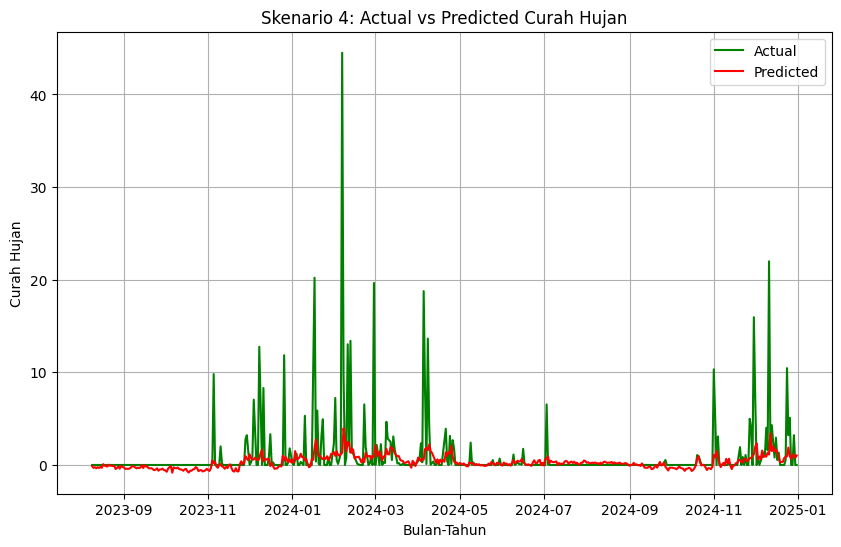

In [167]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_true_denorm, label='Actual', color='green', linestyle='-')
plt.plot(y_test.index, y_pred_denorm, label='Predicted', color='red', linestyle='-')
plt.title("Skenario 4: Actual vs Predicted Curah Hujan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Curah Hujan")
plt.legend()
plt.grid()
plt.show()

## Skenario 5
N Estimator = 10, kernel = RBF

Inisialisasi model SVR dan Setup GridSearchCV untuk Pencarian Hyperparameter Optimal

In [168]:
# Hyperparameter untuk GridSearch
param_grid = {
    'gamma': [0.0005, 0.001, 0.01],
    'C': [0.001, 0.01, 1],
    'epsilon': [0.1, 0.01, 0.001]
}

# Inisialisasi model SVR dengan kernel RBF
svr = SVR(kernel='rbf')

# GridSearch untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hyperparameter optimal
best_params = grid_search.best_params_
print("Hyperparameter optimal:", best_params)

Hyperparameter optimal: {'C': 1, 'epsilon': 0.01, 'gamma': 0.01}


Gunakan Hyperparameter yang optimal untuk SVR dan Ensemble Bagging

In [169]:
# Menggunakan hyperparameter optimal untuk SVR
optimal_svr = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])

# Ensemble Bagging Regressor dengan SVR
bagging_model = BaggingRegressor(estimator=optimal_svr, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

#Simpan model
joblib.dump(bagging_model, 'bagging_svr_model5.pkl')

['bagging_svr_model5.pkl']

Prediksi dengan Data Testing, Denormalisasi dan Evaluasi

In [170]:
# Prediksi dengan model bagging
y_pred = bagging_model.predict(X_test)

In [171]:
# Fungsi untuk denormalisasi menggunakan MinMaxScaler
def denormalize(y):
    return y * (data_max - data_min) + data_min

# Min dan Max dari data asli
data_min = data_outlier['curah_hujan'].min()  # misalnya nilai minimum dari data asli sebelum normalisasi
data_max = data_outlier['curah_hujan'].max() # misalnya nilai maksimum dari data asli sebelum normalisasi

# Denormalisasi
y_true_denorm = denormalize(y_test)
y_pred_denorm = denormalize(y_pred)

In [172]:
# Fungsi manual untuk menghitung MAPE dengan penanganan khusus jika terdapat nilai aktual = 0
def calculate_mape_or_mae(y_test, y_pred):
    if (y_test == 0).any():  # Jika terdapat nilai aktual = 0
        mae = np.mean(np.abs(y_test - y_pred))
        return mae
    else:  # Jika tidak ada nilai aktual = 0
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        return mape

# Evaluasi model menggunakan RMSE dan MAPE
rmse_5 = root_mean_squared_error (y_test, y_pred)
mape_or_mae_5 = calculate_mape_or_mae(y_test, y_pred)

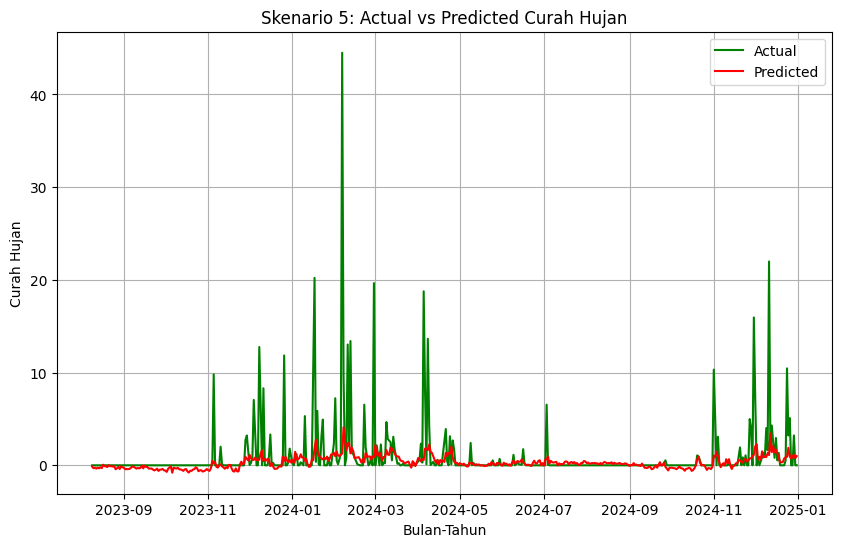

In [173]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_true_denorm, label='Actual', color='green', linestyle='-')
plt.plot(y_test.index, y_pred_denorm, label='Predicted', color='red', linestyle='-')
plt.title("Skenario 5: Actual vs Predicted Curah Hujan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Curah Hujan")
plt.legend()
plt.grid()
plt.show()

## Skenario 6
N Estimator = 20, kernel = RBF

Inisialisasi model SVR dan Setup GridSearchCV untuk Pencarian Hyperparameter Optimal

In [174]:
# Hyperparameter untuk GridSearch
param_grid = {
    'gamma': [0.0005, 0.001, 0.01],
    'C': [0.001, 0.01, 1],
    'epsilon': [0.1, 0.01, 0.001]
}

# Inisialisasi model SVR dengan kernel RBF
svr = SVR(kernel='rbf')

# GridSearch untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hyperparameter optimal
best_params = grid_search.best_params_
print("Hyperparameter optimal:", best_params)

Hyperparameter optimal: {'C': 1, 'epsilon': 0.01, 'gamma': 0.01}


Gunakan Hyperparameter yang optimal untuk SVR dan Ensemble Bagging

In [175]:
# Menggunakan hyperparameter optimal untuk SVR
optimal_svr = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])

# Ensemble Bagging Regressor dengan SVR
bagging_model = BaggingRegressor(estimator=optimal_svr, n_estimators=20, random_state=42)
bagging_model.fit(X_train, y_train)

#Simpan model
joblib.dump(bagging_model, 'bagging_svr_model6.pkl')

['bagging_svr_model6.pkl']

Prediksi dengan Data Testing, Denormalisasi dan Evaluasi

In [176]:
# 13. Prediksi dengan model bagging
y_pred = bagging_model.predict(X_test)

In [177]:
# Fungsi untuk denormalisasi menggunakan MinMaxScaler
def denormalize(y):
    return y * (data_max - data_min) + data_min

# Min dan Max dari data asli
data_min = data_outlier['curah_hujan'].min()  # misalnya nilai minimum dari data asli sebelum normalisasi
data_max = data_outlier['curah_hujan'].max() # misalnya nilai maksimum dari data asli sebelum normalisasi

# Denormalisasi
y_true_denorm = denormalize(y_test)
y_pred_denorm = denormalize(y_pred)

In [178]:
# Fungsi manual untuk menghitung MAPE dengan penanganan khusus jika terdapat nilai aktual = 0
def calculate_mape_or_mae(y_test, y_pred):
    if (y_test == 0).any():  # Jika terdapat nilai aktual = 0
        mae = np.mean(np.abs(y_test - y_pred))
        return mae
    else:  # Jika tidak ada nilai aktual = 0
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        return mape

# Evaluasi model menggunakan RMSE dan MAPE
rmse_6 = root_mean_squared_error (y_test, y_pred)
mape_or_mae_6 = calculate_mape_or_mae(y_test, y_pred)

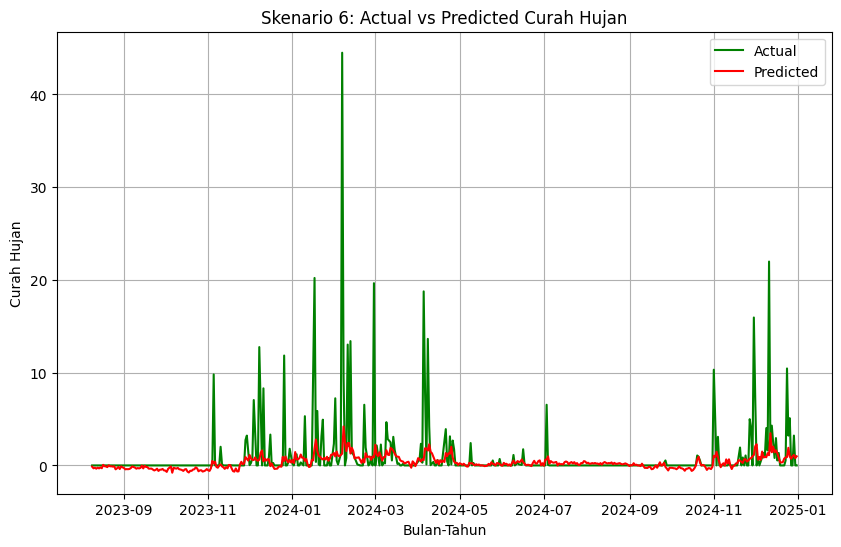

In [179]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_true_denorm, label='Actual', color='green', linestyle='-')
plt.plot(y_test.index, y_pred_denorm, label='Predicted', color='red', linestyle='-')
plt.title("Skenario 6: Actual vs Predicted Curah Hujan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Curah Hujan")
plt.legend()
plt.grid()
plt.show()

## Skenario 7
N Estimator = 5, kernel = Polynomial

Inisialisasi model SVR dan Setup GridSearchCV untuk Pencarian Hyperparameter Optimal

In [180]:
# Hyperparameter untuk GridSearch
param_grid = {
    'degree': [1, 2, 3],
    'C': [0.001, 0.01, 1],
    'epsilon': [0.1, 0.01, 0.001]
}

# Inisialisasi model SVR dengan kernel RBF
svr = SVR(kernel='poly')

# GridSearch untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hyperparameter optimal
best_params = grid_search.best_params_
print("Hyperparameter optimal:", best_params)

Hyperparameter optimal: {'C': 1, 'degree': 2, 'epsilon': 0.01}


Gunakan Hyperparameter yang optimal untuk SVR dan Ensemble Bagging

In [181]:
# Menggunakan hyperparameter optimal untuk SVR
optimal_svr = SVR(kernel='poly', C=best_params['C'], degree=best_params['degree'], epsilon=best_params['epsilon'])

# Ensemble Bagging Regressor dengan SVR
bagging_model = BaggingRegressor(estimator=optimal_svr, n_estimators=5, random_state=42)
bagging_model.fit(X_train, y_train)

#Simpan model
joblib.dump(bagging_model, 'bagging_svr_model7.pkl')

['bagging_svr_model7.pkl']

Prediksi dengan Data Testing, Denormalisasi dan Evaluasi

In [182]:
# Prediksi dengan model bagging
y_pred = bagging_model.predict(X_test)

In [183]:
# Fungsi untuk denormalisasi menggunakan MinMaxScaler
def denormalize(y):
    return y * (data_max - data_min) + data_min

# Min dan Max dari data asli
data_min = data_outlier['curah_hujan'].min()  # misalnya nilai minimum dari data asli sebelum normalisasi
data_max = data_outlier['curah_hujan'].max() # misalnya nilai maksimum dari data asli sebelum normalisasi

# Denormalisasi
y_true_denorm = denormalize(y_test)
y_pred_denorm = denormalize(y_pred)

In [184]:
# Fungsi manual untuk menghitung MAPE dengan penanganan khusus jika terdapat nilai aktual = 0
def calculate_mape_or_mae(y_test, y_pred):
    if (y_test == 0).any():  # Jika terdapat nilai aktual = 0
        mae = np.mean(np.abs(y_test - y_pred))
        return mae
    else:  # Jika tidak ada nilai aktual = 0
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        return mape

# Evaluasi model menggunakan RMSE dan MAPE
rmse_7 = root_mean_squared_error (y_test, y_pred)
mape_or_mae_7 = calculate_mape_or_mae(y_test, y_pred)

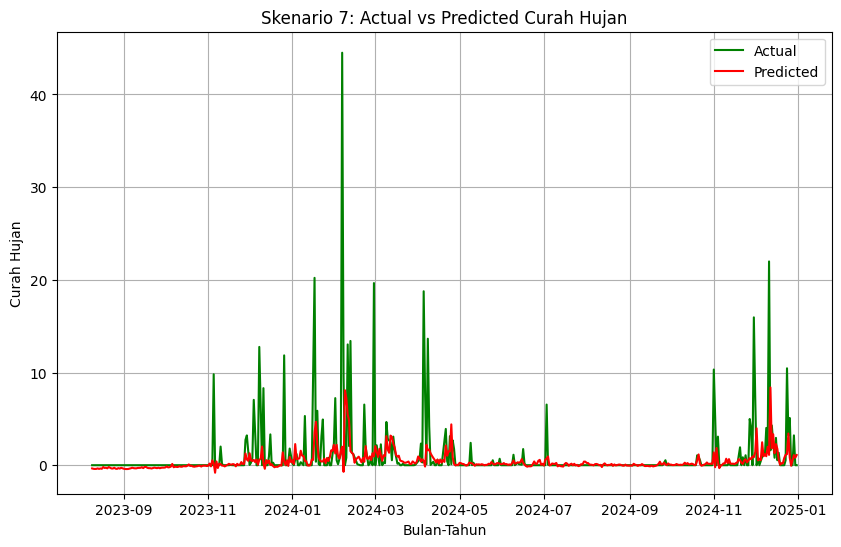

In [185]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_true_denorm, label='Actual', color='green', linestyle='-')
plt.plot(y_test.index, y_pred_denorm, label='Predicted', color='red', linestyle='-')
plt.title("Skenario 7: Actual vs Predicted Curah Hujan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Curah Hujan")
plt.legend()
plt.grid()
plt.show()

## Skenario 8
N Estimator = 10, kernel = Polynomial

Inisialisasi model SVR dan Setup GridSearchCV untuk Pencarian Hyperparameter Optimal

In [186]:
# Hyperparameter untuk GridSearch
param_grid = {
    'degree': [1, 2, 3],
    'C': [0.001, 0.01, 1],
    'epsilon': [0.1, 0.01, 0.001]
}

# Inisialisasi model SVR dengan kernel RBF
svr = SVR(kernel='poly')

# GridSearch untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hyperparameter optimal
best_params = grid_search.best_params_
print("Hyperparameter optimal:", best_params)

Hyperparameter optimal: {'C': 1, 'degree': 2, 'epsilon': 0.01}


Gunakan Hyperparameter yang optimal untuk SVR dan Ensemble Bagging

In [187]:
# Menggunakan hyperparameter optimal untuk SVR
optimal_svr = SVR(kernel='poly', C=best_params['C'], degree=best_params['degree'], epsilon=best_params['epsilon'])

# Ensemble Bagging Regressor dengan SVR
bagging_model = BaggingRegressor(estimator=optimal_svr, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

#Simpan model
joblib.dump(bagging_model, 'bagging_svr_model8.pkl')

['bagging_svr_model8.pkl']

Prediksi dengan Data Testing, Denormalisasi dan Evaluasi

In [188]:
# Prediksi dengan model bagging
y_pred = bagging_model.predict(X_test)

In [189]:
# Fungsi untuk denormalisasi menggunakan MinMaxScaler
def denormalize(y):
    return y * (data_max - data_min) + data_min

# Min dan Max dari data asli
data_min = data_outlier['curah_hujan'].min()  # misalnya nilai minimum dari data asli sebelum normalisasi
data_max = data_outlier['curah_hujan'].max() # misalnya nilai maksimum dari data asli sebelum normalisasi

# Denormalisasi
y_true_denorm = denormalize(y_test)
y_pred_denorm = denormalize(y_pred)

In [190]:
# Fungsi manual untuk menghitung MAPE dengan penanganan khusus jika terdapat nilai aktual = 0
def calculate_mape_or_mae(y_test, y_pred):
    if (y_test == 0).any():  # Jika terdapat nilai aktual = 0
        mae = np.mean(np.abs(y_test - y_pred))
        return mae
    else:  # Jika tidak ada nilai aktual = 0
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        return mape

# Evaluasi model menggunakan RMSE dan MAPE
rmse_8 = root_mean_squared_error (y_test, y_pred)
mape_or_mae_8 = calculate_mape_or_mae(y_test, y_pred)

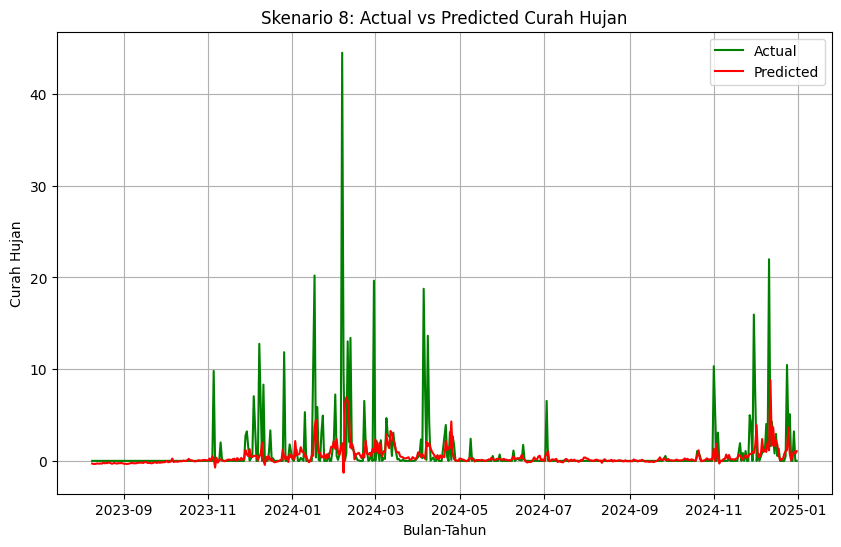

In [191]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_true_denorm, label='Actual', color='green', linestyle='-')
plt.plot(y_test.index, y_pred_denorm, label='Predicted', color='red', linestyle='-')
plt.title("Skenario 8: Actual vs Predicted Curah Hujan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Curah Hujan")
plt.legend()
plt.grid()
plt.show()

## Skenario 9
N Estimator = 20, kernel = Polynomial

Inisialisasi model SVR dan Setup GridSearchCV untuk Pencarian Hyperparameter Optimal

In [192]:
# Hyperparameter untuk GridSearch
param_grid = {
    'degree': [1, 2, 3],
    'C': [0.001, 0.01, 1],
    'epsilon': [0.1, 0.01, 0.001]
}

# Inisialisasi model SVR dengan kernel RBF
svr = SVR(kernel='poly')

# GridSearch untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hyperparameter optimal
best_params = grid_search.best_params_
print("Hyperparameter optimal:", best_params)

Hyperparameter optimal: {'C': 1, 'degree': 2, 'epsilon': 0.01}


Gunakan Hyperparameter yang optimal untuk SVR dan Ensemble Bagging

In [193]:
# Menggunakan hyperparameter optimal untuk SVR
optimal_svr = SVR(kernel='poly', C=best_params['C'], degree=best_params['degree'], epsilon=best_params['epsilon'])

# Ensemble Bagging Regressor dengan SVR
bagging_model = BaggingRegressor(estimator=optimal_svr, n_estimators=20, random_state=42)
bagging_model.fit(X_train, y_train)

#Simpan model
joblib.dump(bagging_model, 'bagging_svr_model9.pkl')

['bagging_svr_model9.pkl']

Prediksi dengan Data Testing, Denormalisasi dan Evaluasi

In [194]:
# Prediksi dengan model bagging
y_pred = bagging_model.predict(X_test)

In [195]:
# Fungsi untuk denormalisasi menggunakan MinMaxScaler
def denormalize(y):
    return y * (data_max - data_min) + data_min

# Min dan Max dari data asli
data_min = data_outlier['curah_hujan'].min()  # misalnya nilai minimum dari data asli sebelum normalisasi
data_max = data_outlier['curah_hujan'].max() # misalnya nilai maksimum dari data asli sebelum normalisasi

# Denormalisasi
y_true_denorm = denormalize(y_test)
y_pred_denorm = denormalize(y_pred)

In [196]:
# Fungsi manual untuk menghitung MAPE dengan penanganan khusus jika terdapat nilai aktual = 0
def calculate_mape_or_mae(y_test, y_pred):
    if (y_test == 0).any():  # Jika terdapat nilai aktual = 0
        mae = np.mean(np.abs(y_test - y_pred))
        return mae
    else:  # Jika tidak ada nilai aktual = 0
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        return mape

# Evaluasi model menggunakan RMSE dan MAPE
rmse_9 = root_mean_squared_error (y_test, y_pred)
mape_or_mae_9 = calculate_mape_or_mae(y_test, y_pred)

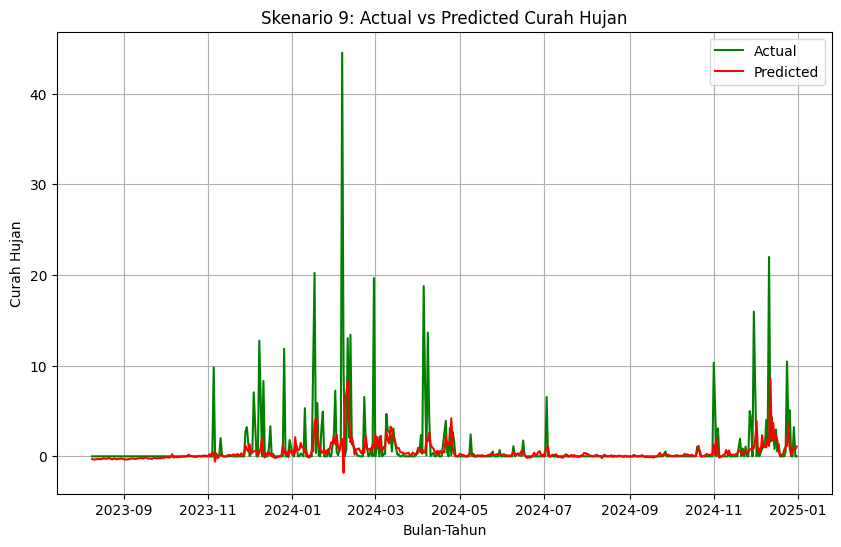

In [197]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_true_denorm, label='Actual', color='green', linestyle='-')
plt.plot(y_test.index, y_pred_denorm, label='Predicted', color='red', linestyle='-')
plt.title("Skenario 9: Actual vs Predicted Curah Hujan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Curah Hujan")
plt.legend()
plt.grid()
plt.show()

# G. Hasil Evaluasi Skenario Pengujian

In [135]:
# Simulasi hasil evaluasi dari 9 skenario
results = {
    'Skenario': [f'Skenario {i}' for i in range(1, 10)],
    'RMSE': [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7, rmse_8, rmse_9],
    'MAPE/MAE': [mape_or_mae_1, mape_or_mae_2, mape_or_mae_3, mape_or_mae_4, mape_or_mae_5,
                 mape_or_mae_6, mape_or_mae_7, mape_or_mae_8, mape_or_mae_9],
    'Metode': [
        "MAE digunakan" if (y_test == 0).any() else "MAPE digunakan"
        for _ in range(9)  # Ulangi untuk 9 skenario
    ]
}

# Buat DataFrame dari hasil
results_df = pd.DataFrame(results)

# Tampilkan hasil dalam tabel
print("Hasil RMSE, MAPE/MAE, dan Metode yang digunakan dari 9 skenario:")
print(results_df)

Hasil RMSE, MAPE/MAE, dan Metode yang digunakan dari 9 skenario:
     Skenario      RMSE  MAPE/MAE         Metode
0  Skenario 1  0.072511  0.024008  MAE digunakan
1  Skenario 2  0.072542  0.024023  MAE digunakan
2  Skenario 3  0.072530  0.023973  MAE digunakan
3  Skenario 4  0.072318  0.024013  MAE digunakan
4  Skenario 5  0.072327  0.023885  MAE digunakan
5  Skenario 6  0.072328  0.023846  MAE digunakan
6  Skenario 7  0.073119  0.023643  MAE digunakan
7  Skenario 8  0.072874  0.023381  MAE digunakan
8  Skenario 9  0.072695  0.023299  MAE digunakan


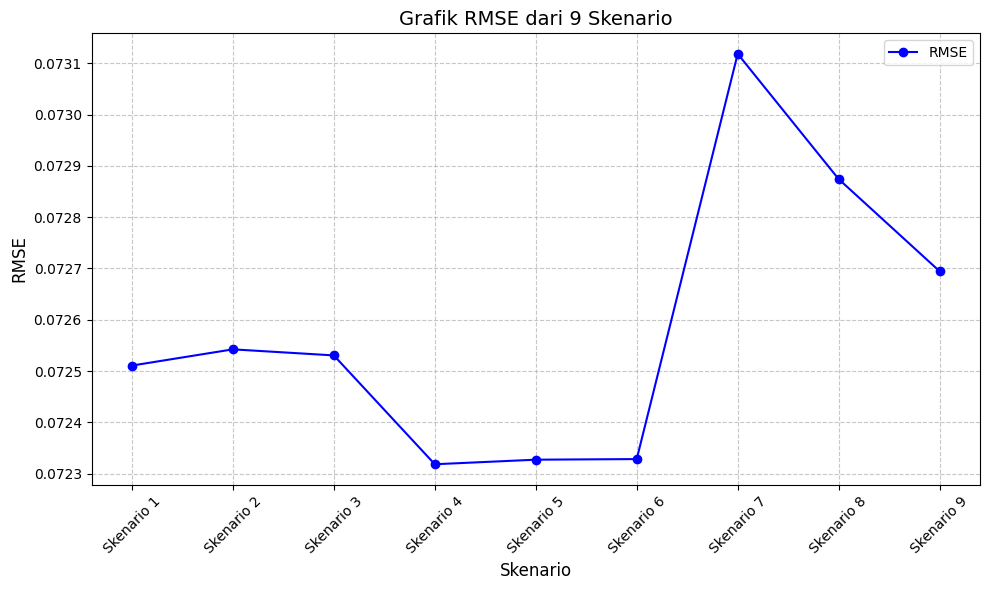

In [136]:
# @title RMSE
# Plot line chart untuk RMSE dari 9 skenario
plt.figure(figsize=(10, 6))
plt.plot(results_df['Skenario'], results_df['RMSE'], marker='o', linestyle='-', color='blue', label='RMSE')

# Tambahkan label, judul, dan grid
plt.title('Grafik RMSE dari 9 Skenario', fontsize=14)
plt.xlabel('Skenario', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(rotation=45)  # Putar label sumbu X agar mudah dibaca
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


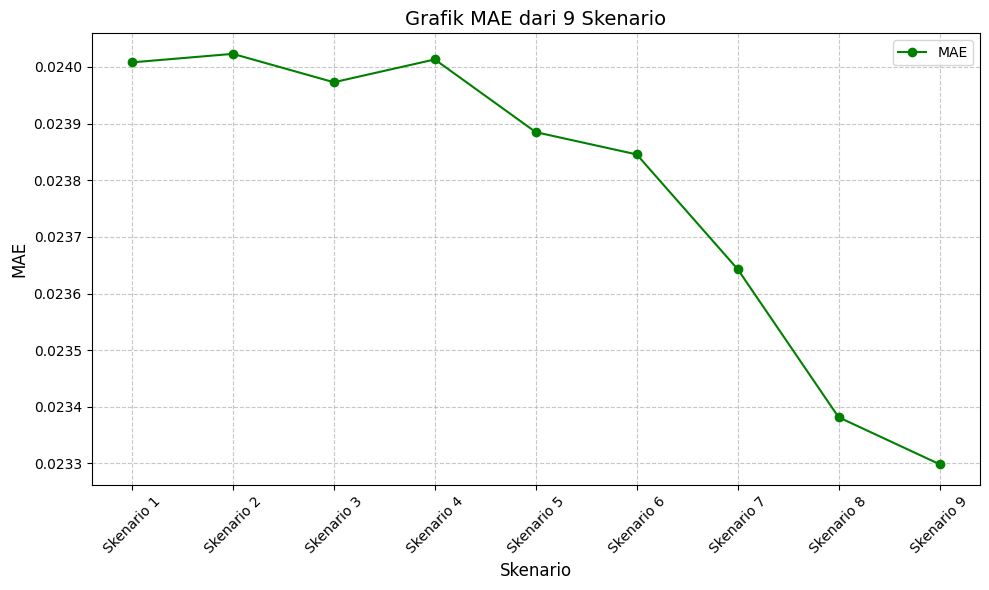

In [137]:
# @title MAE
# Plot line chart untuk MAE dari 9 skenario
plt.figure(figsize=(10, 6))
plt.plot(results_df['Skenario'], results_df['MAPE/MAE'], marker='o', linestyle='-', color='green', label='MAE')

# Tambahkan label, judul, dan grid
plt.title('Grafik MAE dari 9 Skenario', fontsize=14)
plt.xlabel('Skenario', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.xticks(rotation=45)  # Putar label sumbu X agar mudah dibaca
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()
